# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
#pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import csv
from itertools import islice
from decimal import Decimal
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
import openpyxl
import pytest
pd.set_option('mode.chained_assignment', None)

In [3]:
# RUN ONLY ONCE
# os.chdir is used to change the current directory to the specified path
os.chdir("../") # Sets path to the repo folder as it is one level above where this file exists!
path = os.getcwd()
print(path)

/Users/vivaanwadhwa/Documents/GitHub/CFFS_sharon_2024


***
## Import Cleaned Datasets

In [4]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Items_List.csv"))
Items.dtypes

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

In [5]:
Items.head()

ItemId              Description  CaseQty CaseUOM  PakQty PakUOM  \
0   I-7631           5 SPICE POWDER      1.0      ea     1.0     lb   
1  I-43851               AJWAIN 5LB      5.0      lb   454.0      g   
2   I-3617  ALLSPICE GROUND SHAKER       8.0    each   454.0      g   
3   I-1852    ALMOND BEV - ORIGINAL     24.0      CT     1.0     CT   
4  I-44059           ALMOND BUTTER*     10.0      Kg     1.0     Kg   

   InventoryGroup  
0          SPICES  
1          SPICES  
2          SPICES  
3        BEVERAGE  
4  FOOD - GROCERY

In [6]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Ingredients_List.csv"))
Ingredients.dtypes

IngredientId     object
Qty             float64
Uom              object
Conversion      float64
InvFactor       float64
Recipe           object
dtype: object

In [7]:
Ingredients

IngredientId    Qty  Uom  Conversion  InvFactor   Recipe
0          P-9857    5.0   Kg       1.000     1.1111  P-10112
1         P-48933    1.0   Kg       1.000     1.0000  P-10113
2          I-4626   16.0   CT       1.000     2.6667  P-10115
3          P-9755    1.0   lb       1.000     1.0000  P-10119
4         P-18746    1.0   Kg       1.000     1.0000  P-10241
...           ...    ...  ...         ...        ...      ...
5383      P-71658  175.0   ml       0.001     1.0000  R-73663
5384      P-73664    1.0   ea       1.000     1.0000  R-73665
5385      P-71996    1.0  PTN       1.000     1.0000  R-73666
5386      P-72051  350.0   ml       0.001     1.0000  R-73669
5387      P-73262  225.0    g       0.001     1.0000  R-73679

[5388 rows x 6 columns]

In [8]:
Ingredients.head()

IngredientId   Qty Uom  Conversion  InvFactor   Recipe
0       P-9857   5.0  Kg         1.0     1.1111  P-10112
1      P-48933   1.0  Kg         1.0     1.0000  P-10113
2       I-4626  16.0  CT         1.0     2.6667  P-10115
3       P-9755   1.0  lb         1.0     1.0000  P-10119
4      P-18746   1.0  Kg         1.0     1.0000  P-10241

In [9]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_List_Cleaned.csv"))
Preps.dtypes

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

In [10]:
Preps.head()
Preps.shape

(890, 7)

In [11]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Products_List.csv"))
Products.dtypes

ProdId         object
Description    object
SalesGroup     object
dtype: object

In [12]:
Products.head()

ProdId                    Description   SalesGroup
0  R-73669  DEL|smoothie| mango pineapple  GV - DELISH
1  R-56613   DEL|Smoothie|Almonds forever  GV - DELISH
2  R-44306    DEL|Smoothie|Banana Matcha   GV - DELISH
3  R-43697  DEL|Smoothie|Blueberry Boost   GV - DELISH
4  R-46074    DEL|Smoothie|Bna Almnd Buta  GV - DELISH

In [13]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Conversions_Added.csv"))
Conversions.dtypes

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

In [14]:
Conversions

ConversionId  Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
0         I-67659    0.008818           1.000           each       113.398   
1         I-28697    0.005181           1.000             ea       193.000   
2         I-47441    0.005181           1.000             ea       193.000   
3          I-1905    0.012500           1.000             CT        80.000   
4         I-47440    0.005051           1.000             ea       198.000   
...           ...         ...             ...            ...           ...   
1264      I-72414    0.000357           0.025             cs        70.000   
1265      I-62928    0.010526           1.000             ea        95.000   
1266      I-73417    0.007143           1.000             ea       140.000   
1267      I-73414    0.007143           1.000             ea       140.000   
1268      I-73416    0.008850           1.000             ea       113.000   

     ConvertToUom  
0               g  
1               g  
2               g  
3               g  
4               g  
...           ...  
1264            g  
1265            g  
1266            g  
1267            g  
1268            g  

[1269 rows x 6 columns]

In [15]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "Mapping.csv"))
mapping.dtypes

ItemId                                                     object
CategoryID                                                float64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Food Category_y                                            object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Land Use (m^2)                                            float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

In [16]:
mapping

ItemId  CategoryID               Description  CaseQty CaseUOM  PakQty  \
0     I-57545         1.0   CHUCK FLAT BONELESS FZN     3.30      Kg     1.0   
1     I-10869         1.0       BEEF STIRFRY COV FR     5.00      Kg     1.0   
2      I-7064         1.0     BEEF OUTSIDE FLAT AAA     1.00      Kg     1.0   
3     I-37005         1.0            BEEF MEATBALLS     4.54      Kg  1000.0   
4     I-37002         1.0  BEEF INSIDE ROUND SHAVED     9.00      Kg  1000.0   
...       ...         ...                       ...      ...     ...     ...   
2906  I-36775        25.0          RICE CALROSE BAG     1.00      ea    20.0   
2907  I-71940        25.0           RICE PARBOILED*    20.00      Kg     1.0   
2908  I-72190        58.0         SAUCE MIRIN*SWEET    12.00  bottle     1.0   
2909  I-10481        26.0               SESAME BLK*     1.00      Kg     2.2   
2910  I-71943        26.0       SUNFLOWER RST*N/SLT     2.00     bag     1.5   

     PakUOM  InventoryGroup      Food Category_y  \
0        Kg            MEAT  beef & buffalo meat   
1        Kg            MEAT  beef & buffalo meat   
2        Kg            MEAT  beef & buffalo meat   
3         g            MEAT  beef & buffalo meat   
4         g            MEAT  beef & buffalo meat   
...     ...             ...                  ...   
2906     Kg  FOOD - GROCERY                 rice   
2907     Kg  FOOD - GROCERY                 rice   
2908      L  FOOD - GROCERY       sauces & paste   
2909     lb  FOOD - GROCERY  tree nuts and seeds   
2910     Kg  FOOD - GROCERY  tree nuts and seeds   

      Active Total Supply Chain Emissions (kg CO2 / kg food)  \
0                                               41.3463        
1                                               41.3463        
2                                               41.3463        
3                                               41.3463        
4                                               41.3463        
...                                                 ...        
2906                                             2.5345        
2907                                             2.5345        
2908                                             0.0000        
2909                                             4.2854        
2910                                             4.2854        

      g N lost/kg product  Land Use (m^2)  Freshwater Withdrawals (L/FU)  \
0                  329.50         0.12645                       1677.200   
1                  329.50         0.12645                       1677.200   
2                  329.50         0.12645                       1677.200   
3                  329.50         0.12645                       1677.200   
4                  329.50         0.12645                       1677.200   
...                   ...             ...                            ...   
2906                 5.30         0.00217                       1574.900   
2907                 5.30         0.00217                       1574.900   
2908                 6.75         0.00000                         20.225   
2909                12.20         0.00692                       1823.300   
2910                12.20         0.00692                       1823.300   

      Stress-Weighted Water Use (L/FU)  
0                            61309.000  
1                            61309.000  
2                            61309.000  
3                            61309.000  
4                            61309.000  
...                                ...  
2906                          4625.600  
2907                          4625.600  
2908                          1134.925  
2909                        129364.300  
2910                        129364.300  

[2911 rows x 14 columns]

In [17]:
# Check if there are any duplicates in the mapping dataframe, "ItemId" column? False is good.
check = mapping["ItemId"].duplicated().any()
check

False

In [18]:
mapping.loc[mapping["ItemId"] == 'I-62863']

ItemId  CategoryID                    Description  CaseQty CaseUOM  \
1988  I-62863        59.0  CK|G&G|HMR|Meat Ball & Pasta.      1.0      ea   

      PakQty PakUOM   InventoryGroup    Food Category_y  \
1988     1.0     ea  PRODUCTION FOOD  manually adjusted   

      Active Total Supply Chain Emissions (kg CO2 / kg food)  \
1988                                                0.0        

      g N lost/kg product  Land Use (m^2)  Freshwater Withdrawals (L/FU)  \
1988                  0.0             0.0                            0.0   

      Stress-Weighted Water Use (L/FU)  
1988                               0.0

### Unit Converter

In [19]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty ConvertToUom
0     4.92890               1            tsp       4.92890           ml
1    14.78700               1           Tbsp      14.78700           ml
2   946.35000               1             qt     946.35000           ml
3   473.17625               1             pt     473.17625           ml
4    28.34950               1             oz      28.34950            g

In [20]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

PrepId                 Description  PakQty PakUOM InventoryGroup   StdQty  \
0  P-54697             LEMON|Wedge 1/8     8.0   each           PREP     84.0   
1  P-35132  MARINATED|Lemon & Herb Chx   185.0     ea           PREP  24050.0   
2  P-51992   YIELD|Bread|Sourdough 5/8    36.0  slice            NaN   1620.0   
3  P-26234  BATCH|Roasted Garlic Bread    16.0     ea           PREP   1280.0   
4  P-26170           GRILLED|NaanBread     1.0     ea           PREP    125.0   

  StdUom  
0      g  
1      g  
2      g  
3      g  
4      g

In [21]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()

ConversionId Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
470      P-73664   0.003433             2.0             ea         582.5   
471      P-38874   0.011765             1.0          piece          85.0   
472      P-72899   0.009524            50.0            PTN        5250.0   
473      P-72896   0.008197           100.0            PTN       12200.0   
474      P-72885   0.004854            45.0            PTN        9270.0   

    ConvertToUom  
470            g  
471            g  
472            g  
473            g  
474            g

In [22]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

ConversionId Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
1739      P-73664   0.003433             2.0             ea         582.5   
1740      P-38874   0.011765             1.0          piece          85.0   
1741      P-72899   0.009524            50.0            PTN        5250.0   
1742      P-72896   0.008197           100.0            PTN       12200.0   
1743      P-72885   0.004854            45.0            PTN        9270.0   

     ConvertToUom  
1739            g  
1740            g  
1741            g  
1742            g  
1743            g

In [23]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [24]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [25]:
# Test the std_converter
std_converter(0.25,'lb')

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)


(113.398, 'g')

In [26]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))

def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit: #convert to std uom for ingredients has no specific convention instruction
        return std_converter(qty, uom)
    elif ingre in spc_cov: #convert to std uom for ingredients has specific convention instruction
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion.drop_duplicates(subset=['ConversionId'], inplace = True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            #print(conversion)
            Qty = float(qty)/float(multiplier)
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [27]:
spc_cov

['I-67659',
 'I-28697',
 'I-47441',
 'I-1905',
 'I-47440',
 'I-13327',
 'I-54484',
 'I-2501',
 'I-52609',
 'I-52636',
 'I-2772',
 'I-20347',
 'I-54756',
 'I-41251',
 'I-2833',
 'I-54761',
 'I-54755',
 'I-54759',
 'I-63749',
 'I-54758',
 'I-53847',
 'I-34313',
 'I-19639',
 'I-63683',
 'I-19700',
 'I-3902',
 'I-63690',
 'I-48660',
 'I-2546',
 'I-1727',
 'I-2118',
 'I-2778',
 'I-63698',
 'I-2116',
 'I-2120',
 'I-32271',
 'I-38717',
 'I-31549',
 'I-53226',
 'I-32265',
 'I-41807',
 'I-41805',
 'I-63977',
 'I-43988',
 'I-42899',
 'I-13970',
 'I-54757',
 'I-51331',
 'I-38957',
 'I-41804',
 'I-41800',
 'I-55664',
 'I-41803',
 'I-54483',
 'I-54482',
 'I-42194',
 'I-42203',
 'I-42202',
 'I-42201',
 'I-42200',
 'I-42197',
 'I-42204',
 'I-40471',
 'I-40472',
 'I-40473',
 'I-40474',
 'I-42196',
 'I-42199',
 'I-42198',
 'I-53014',
 'I-42210',
 'I-2768',
 'I-20879',
 'I-28641',
 'I-47441',
 'I-47440',
 'I-2501',
 'I-13327',
 'I-49783',
 'I-47430',
 'I-28685',
 'I-19910',
 'I-45537',
 'I-41375',
 'I-2

In [28]:
# Test the spc_converter
spc_converter('I-1120', 1, 'CT')

(1, 'CT')

In [29]:
spc_converter('P-35132', 1, 'ea')

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/1228884068.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)


(130.0, 'g')

## GHG Factors Calculation for Preps

In [30]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0
Preps['Land Use (m^2)'] = 0
Preps['Land Use (m^2)/StdUom'] = 0

In [31]:
Ingredients.head()

IngredientId   Qty Uom  Conversion  InvFactor   Recipe
0       P-9857   5.0  Kg         1.0     1.1111  P-10112
1      P-48933   1.0  Kg         1.0     1.0000  P-10113
2       I-4626  16.0  CT         1.0     2.6667  P-10115
3       P-9755   1.0  lb         1.0     1.0000  P-10119
4      P-18746   1.0  Kg         1.0     1.0000  P-10241

In [32]:
Preps.loc[Preps["PrepId"] == "P-67984"]

Empty DataFrame
Columns: [PrepId, Description, PakQty, PakUOM, InventoryGroup, StdQty, StdUom, GHG Emission (g), GHG Emission(g)/StdUom, N lost (g), N lost (g)/StdUom, Freshwater Withdrawals (ml), Freshwater Withdrawals (ml)/StdUom, Stress-Weighted Water Use (ml), Stress-Weighted Water Use (ml)/StdUom, Land Use (m^2), Land Use (m^2)/StdUom]
Index: []

In [33]:
Preps.head()

PrepId                  Description  PakQty PakUOM       InventoryGroup  \
0  P-68207  24|BATCH|Poblano Pork Stew*   100.0    PTN                 PREP   
1  P-61322                  AIOLI|Pesto     4.0      L  ZDONT USE OK - PREP   
2  P-46066           Almond Milk Yeild    900.0     ml                  NaN   
3   P-8814    Aoli- RoastedGarlic Thyme     1.1      L                  NaN   
4  P-49605                 APPLE|Cubed     75.0      g                  NaN   

    StdQty StdUom  GHG Emission (g)  GHG Emission(g)/StdUom  N lost (g)  \
0  28800.0      g                 0                       0           0   
1   4000.0     ml                 0                       0           0   
2    900.0     ml                 0                       0           0   
3   1100.0     ml                 0                       0           0   
4     75.0      g                 0                       0           0   

   N lost (g)/StdUom  Freshwater Withdrawals (ml)  \
0                  0                            0   
1                  0                            0   
2                  0                            0   
3                  0                            0   
4                  0                            0   

   Freshwater Withdrawals (ml)/StdUom  Stress-Weighted Water Use (ml)  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   Stress-Weighted Water Use (ml)/StdUom  Land Use (m^2)  \
0                                      0               0   
1                                      0               0   
2                                      0               0   
3                                      0               0   
4                                      0               0   

   Land Use (m^2)/StdUom  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [34]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for items as ingredients only
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "Land Use (m^2)"]
    #print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            print(ingre)
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            print(ghge)
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            else:
                print("Test")
                qty = std_converter(Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            #print(ghg, nitro, water, str_water)
            # print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [35]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)/1000
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instea

I-30068
968    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
968    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3290
416    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
416    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3435
887    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
887    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3629
1230    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1230    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3630
673    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
673    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3858
2322    9.8315
Name: Active Total S

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)/1000
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instea

558    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-17151
571    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
571    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2697
1428    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1428    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4689
1070    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1070    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-47399
116    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
116    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2141
103    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
103    8.9104
Name: Active Total Su

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)/1000
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3725526202.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  

In [36]:
mapping.loc[mapping["ItemId"] == "I-5012"]

ItemId  CategoryID             Description  CaseQty CaseUOM  PakQty  \
720  I-5012        31.0  PEACH SLCD GRADE A IQF      2.0     bag     2.5   

    PakUOM InventoryGroup Food Category_y  \
720     Kg        PRODUCE    other fruits   

     Active Total Supply Chain Emissions (kg CO2 / kg food)  \
720                                             0.4306        

     g N lost/kg product  Land Use (m^2)  Freshwater Withdrawals (L/FU)  \
720                  2.7         0.00071                            3.5   

     Stress-Weighted Water Use (L/FU)  
720                               4.7

In [37]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'Land Use (m^2)/StdUom']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, Qty, Uom, qty, qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [38]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([1.88392800e+07, 1.01125000e+04, 1.00000000e+00, 1.00919000e+04,
       2.13409829e+04, 1.00600000e+04, 1.41578400e+06, 8.57615000e+05,
       1.07610000e+05, 5.15926000e+05, 1.25760000e+05, 0.00000000e+00,
       8.17850000e+04, 2.99989750e+06, 1.89250000e+04, 1.09622442e+04,
       8.87000000e+03, 9.53700000e+03, 9.37094850e+05, 1.51952950e+05,
       1.42500000e+04, 4.19200000e+06, 3.21239700e+06, 4.68900000e+03,
       8.40000000e+01, 1.60744850e+05, 3.64973000e+05, 2.09775000e+06,
       1.22020669e+05, 1.86200000e+04, 1.59600000e+04, 2.72500000e+05,
       2.71600000e+04, 1.68309700e+07, 1.81030000e+06, 1.81239890e+08,
       3.56525408e+04, 1.19472000e+05, 3.28221200e+05, 1.25760000e+04,
       1.82000000e+03, 2.56700000e+04, 1.81030000e+07, 7.62650000e+04,
       1.37582800e+07, 3.73769940e+06, 4.02250000e+04, 9.38342000e+04,
       3.98100000e+04, 1.18610435e+07, 2.85677500e+05, 2.90891400e+06,
       2.15184850e+06, 2.21271150e+06, 1.01017600e+06, 1.83750601e+06,
      

In [39]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # Added this print statement July 31
    # print('Index:', index, '\nIngres:\n', ingres)
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            print(ingres)
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, ghge, Qty, Uom, qty, weight)
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [40]:
for index, row in Preps.iterrows():
    link_preps(index, row)

     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1297      P-48877  6.0  Kg         1.0        1.0  P-49155
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2360      P-46492  1.0  Kg         1.0        1.0  P-57337
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2480      P-50295  500.0   g         1.0        1.0  P-61991
   IngredientId    Qty Uom  Conversion  InvFactor   Recipe
98      P-26514  500.0   g         1.0     1000.0  P-24750
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1822      P-34084  20.0   g         1.0       10.0  P-51508
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2744      P-56490  10.0  Kg         1.0     1.1111  P-70741
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2437      P-56490  10.0  Kg         1.0     1.1765  P-58450
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2302      P-51130  145.0   g         1.0     1.0357  P-56717
     IngredientId   Qty Uom  Conversion  I

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/2769458276.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg = qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/2769458276.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro = qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/2769458276.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  wat

     IngredientId  Qty Uom  Conversion  InvFactor  Recipe
3431       P-9713  1.0  Kg         1.0     1.1111  P-9714
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
548      P-19175  11.55  Kg         1.0      1.049  P-35258
     IngredientId    Qty Uom  Conversion  InvFactor  Recipe
3457       P-9778  11.25  Kg         1.0     0.0146  P-9779
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1309      P-46076  20.0   g       0.001        1.0  P-49552
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1314      P-49571  10.0  Kg         1.0     1.1765  P-49610
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2361      P-57007  5.0  Kg         1.0     1.1111  P-57371


In [41]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/7797307.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/7797307.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/7797307.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/7797307.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  str_water += qty*

In [42]:
Preps

PrepId                  Description  PakQty PakUOM       InventoryGroup  \
0    P-68207  24|BATCH|Poblano Pork Stew*   100.0    PTN                 PREP   
1    P-61322                  AIOLI|Pesto     4.0      L  ZDONT USE OK - PREP   
2    P-46066           Almond Milk Yeild    900.0     ml                  NaN   
3     P-8814    Aoli- RoastedGarlic Thyme     1.1      L                  NaN   
4    P-49605                 APPLE|Cubed     75.0      g                  NaN   
..       ...                          ...     ...    ...                  ...   
885  P-62250          YIELD|Yam Fries|GRL     1.6     Kg                  NaN   
886  P-24452          YIELD|Yellow Onion*     0.9     Kg                  NaN   
887  P-45120          YIELD|Yellow Pepper     0.8     Kg                  NaN   
888  P-62405               YIELD|Zucchini   938.0      g                  NaN   
889   P-9756               YIELD|Zucchini     0.9     Kg                  NaN   

      StdQty StdUom  GHG Emission (g)  GHG Emission(g)/StdUom   N lost (g)  \
0    28800.0      g     127591.855624                4.430273  2001.487960   
1     4000.0     ml         62.407776                0.015602     3.412194   
2      900.0     ml          0.000000                0.000000     0.000000   
3     1100.0     ml        114.535700                0.104123     0.992950   
4       75.0      g         65.174147                0.868989     0.491400   
..       ...    ...               ...                     ...          ...   
885   1600.0      g       1050.232518                0.656395    10.018480   
886    900.0      g        301.500000                0.335000     7.900000   
887    800.0      g        502.900000                0.628625     7.900000   
888    938.0      g        502.900000                0.536141     7.900000   
889    900.0      g        502.900000                0.558778     7.900000   

     N lost (g)/StdUom  Freshwater Withdrawals (ml)  \
0             0.069496                 2.084555e+07   
1             0.000853                 1.024970e+04   
2             0.000000                 1.000000e+00   
3             0.000903                 1.009190e+04   
4             0.006552                 2.134098e+04   
..                 ...                          ...   
885           0.006262                 1.060915e+04   
886           0.008778                 1.900000e+03   
887           0.009875                 8.130000e+04   
888           0.008422                 8.130000e+04   
889           0.008778                 8.130000e+04   

     Freshwater Withdrawals (ml)/StdUom  Stress-Weighted Water Use (ml)  \
0                            723.803704                    5.846690e+08   
1                              2.562426                    5.686764e+05   
2                              0.001111                    1.000000e+00   
3                              9.174455                    3.614175e+05   
4                            284.546439                    1.869972e+05   
..                                  ...                             ...   
885                            6.630717                    5.516985e+05   
886                            2.111111                    5.700000e+04   
887                          101.625000                    2.939500e+06   
888                           86.673774                    2.939500e+06   
889                           90.333333                    2.939500e+06   

     Stress-Weighted Water Use (ml)/StdUom  Land Use (m^2)  \
0                             20301.008523      284.216577   
1                               142.169099        0.170816   
2                                 0.001111        0.000000   
3                               328.561364        0.299620   
4                              2493.296628        0.111020   
..                                     ...             ...   
885                             344.811579        2.102588   
886                              63.33

In [43]:
Ingredients.loc[Ingredients["IngredientId"] == "P-50509"]

Empty DataFrame
Columns: [IngredientId, Qty, Uom, Conversion, InvFactor, Recipe]
Index: []

In [44]:
Preps["GHG Emission (g)"].unique()

array([1.27591856e+05, 6.24077755e+01, 0.00000000e+00, 1.14535700e+02,
       6.51741466e+01, 1.44358889e+04, 2.17428144e+04, 8.10977200e+03,
       6.44896278e+02, 2.74884682e+04, 2.17155365e+03, 1.84078068e+03,
       3.91969922e+03, 2.79234456e+04, 3.67422071e+04, 1.16843493e+03,
       1.16364881e+04, 9.93531067e+02, 8.58132617e+03, 1.90255083e+03,
       6.96908574e+03, 5.31142220e+02, 7.29552943e+03, 2.47851652e+03,
       1.40464980e+04, 1.52250000e+04, 3.90062881e+04, 1.33644956e+04,
       2.05634730e+03, 3.71742943e+03, 1.88927332e+03, 2.99423159e+03,
       7.61250000e+03, 5.27297412e+03, 3.47697732e+05, 3.11000000e+03,
       2.24980000e+02, 4.16888210e+05, 1.07473450e+04, 1.14398566e+06,
       1.29487103e+02, 2.08394458e+03, 5.18352546e+03, 4.56750000e+01,
       1.79905312e+04, 5.59009000e+03, 9.97422186e+04, 7.67130000e+03,
       7.65034233e+04, 4.64340383e+04, 2.28363960e+03, 1.58655375e+04,
       8.38956511e+04, 1.08786269e+04, 1.53315625e+04, 7.35347600e+03,
      

In [45]:
path = os.path.join(os.getcwd(), "data", "final", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [46]:
Products['Weight (g)'] = 0
Products['GHG Emission (g)'] = 0
Products['N lost (g)'] = 0
Products['Freshwater Withdrawals (ml)'] = 0
Products['Stress-Weighted Water Use (ml)'] = 0

# most recently added
Products['Land Use (m^2)'] = 0

In [47]:
Items["ItemId"].unique()

array(['I-7631', 'I-43851', 'I-3617', 'I-1852', 'I-44059', 'I-43854',
       'I-43652', 'I-2852', 'I-2853', 'I-6924', 'I-11181', 'I-4255',
       'I-29389', 'I-4458', 'I-13253', 'I-18918', 'I-4971', 'I-4465',
       'I-4472', 'I-4973', 'I-65741', 'I-27410', 'I-63697', 'I-1252',
       'I-1207', 'I-18089', 'I-4495', 'I-4496', 'I-4491', 'I-3119',
       'I-22443', 'I-4507', 'I-3130', 'I-3133', 'I-3141', 'I-3310',
       'I-38906', 'I-53706', 'I-3619', 'I-2567', 'I-2866', 'I-23336',
       'I-3143', 'I-4518', 'I-3144', 'I-7935', 'I-3145', 'I-3146',
       'I-10616', 'I-3743', 'I-3149', 'I-34065', 'I-3838', 'I-37002',
       'I-3846', 'I-7064', 'I-17670', 'I-11661', 'I-72216', 'I-3867',
       'I-4521', 'I-13050', 'I-32246', 'I-7185', 'I-4531', 'I-2574',
       'I-43648', 'I-4538', 'I-41921', 'I-73416', 'I-73415', 'I-4546',
       'I-31126', 'I-63874', 'I-67659', 'I-72414', 'I-63034', 'I-6020',
       'I-8060', 'I-4550', 'I-4558', 'I-4557', 'I-4556', 'I-13635',
       'I-3159', 'I-3586', '

In [48]:
Products.head()

ProdId                    Description   SalesGroup  Weight (g)  \
0  R-73669  DEL|smoothie| mango pineapple  GV - DELISH           0   
1  R-56613   DEL|Smoothie|Almonds forever  GV - DELISH           0   
2  R-44306    DEL|Smoothie|Banana Matcha   GV - DELISH           0   
3  R-43697  DEL|Smoothie|Blueberry Boost   GV - DELISH           0   
4  R-46074    DEL|Smoothie|Bna Almnd Buta  GV - DELISH           0   

   GHG Emission (g)  N lost (g)  Freshwater Withdrawals (ml)  \
0                 0           0                            0   
1                 0           0                            0   
2                 0           0                            0   
3                 0           0                            0   
4                 0           0                            0   

   Stress-Weighted Water Use (ml)  Land Use (m^2)  
0                               0               0  
1                               0               0  
2                               0               0  
3                               0               0  
4                               0               0

In [49]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']

    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]

    # print('Index:', index, '\nIngres:\n', ingres)
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        
        # Check if the ingredient is present in the mapping
        mapping_ingre = mapping.loc[mapping['ItemId'] == ingre]
        if not mapping_ingre.empty:
            ghge = mapping_ingre['Active Total Supply Chain Emissions (kg CO2 / kg food)'].iloc[0]
            nitro_fac = mapping_ingre['g N lost/kg product'].iloc[0]
            water_fac = mapping_ingre['Freshwater Withdrawals (L/FU)'].iloc[0]
            str_water_fac = mapping_ingre['Stress-Weighted Water Use (L/FU)'].iloc[0]
            land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]

            Qty = float(ingres.loc[idx, 'Qty'])
            Uom = ingres.loc[idx, 'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]

            weight += qty
            ghg += qty * float(ghge)
            nitro += qty * float(nitro_fac) / 1000
            water += qty * float(water_fac)
            str_water += qty * float(str_water_fac)
            land += qty * float(land_fac)

    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [50]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps["PrepId"] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
                
            # print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [51]:
Ingredients

IngredientId    Qty  Uom  Conversion  InvFactor   Recipe
0          P-9857    5.0   Kg       1.000     1.1111  P-10112
1         P-48933    1.0   Kg       1.000     1.0000  P-10113
2          I-4626   16.0   CT       1.000     2.6667  P-10115
3          P-9755    1.0   lb       1.000     1.0000  P-10119
4         P-18746    1.0   Kg       1.000     1.0000  P-10241
...           ...    ...  ...         ...        ...      ...
5383      P-71658  175.0   ml       0.001     1.0000  R-73663
5384      P-73664    1.0   ea       1.000     1.0000  R-73665
5385      P-71996    1.0  PTN       1.000     1.0000  R-73666
5386      P-72051  350.0   ml       0.001     1.0000  R-73669
5387      P-73262  225.0    g       0.001     1.0000  R-73679

[5388 rows x 6 columns]

In [52]:
Products

ProdId                    Description       SalesGroup  Weight (g)  \
0    R-73669  DEL|smoothie| mango pineapple      GV - DELISH           0   
1    R-56613   DEL|Smoothie|Almonds forever      GV - DELISH           0   
2    R-44306    DEL|Smoothie|Banana Matcha       GV - DELISH           0   
3    R-43697  DEL|Smoothie|Blueberry Boost       GV - DELISH           0   
4    R-46074    DEL|Smoothie|Bna Almnd Buta      GV - DELISH           0   
..       ...                            ...              ...         ...   
385  R-57248                SL|Veg blend|SL             FOOD           0   
386  R-57247               SL|Veg blend|UBC             FOOD           0   
387  R-62144  SL|Vegetable lasagne|220g|aad  GV SIMPLY LOCAL           0   
388  R-62193     SL|vegetables x2|RATIO|NEW  GV SIMPLY LOCAL           0   
389  R-62240     SL|Yam Stuffed Chicken|AAD  GV SIMPLY LOCAL           0   

     GHG Emission (g)  N lost (g)  Freshwater Withdrawals (ml)  \
0                   0           0                            0   
1                   0           0                            0   
2                   0           0                            0   
3                   0           0                            0   
4                   0           0                            0   
..                ...         ...                          ...   
385                 0           0                            0   
386                 0           0                            0   
387                 0           0                            0   
388                 0           0                            0   
389                 0           0                            0   

     Stress-Weighted Water Use (ml)  Land Use (m^2)  
0                                 0               0  
1                                 0               0  
2                                 0               0  
3                                 0               0  
4                                 0               0  
..                              ...             ...  
385                               0               0  
386                               0               0  
387                               0               0  
388                               0               0  
389                               0               0  

[390 rows x 9 columns]

In [53]:
Products["ProdId"].unique()

array(['R-73669', 'R-56613', 'R-44306', 'R-43697', 'R-46074', 'R-55185',
       'R-44591', 'R-73662', 'R-36817', 'R-56680', 'R-40466', 'R-73665',
       'R-36763', 'R-73666', 'R-49036', 'R-73663', 'R-14085', 'R-37741',
       'R-47286', 'R-49029', 'R-49030', 'R-37809', 'R-54202', 'R-64951',
       'R-27275', 'R-65942', 'R-32886', 'R-43738', 'R-57179', 'R-36666',
       'R-36575', 'R-54039', 'R-55057', 'R-64398', 'R-65761', 'R-50333',
       'R-65513', 'R-40621', 'R-51215', 'R-67295', 'R-56895', 'R-64698',
       'R-55942', 'R-70058', 'R-70095', 'R-71818', 'R-44732', 'R-70057',
       'R-61853', 'R-61855', 'R-72313', 'R-66411', 'R-73481', 'R-69124',
       'R-73482', 'R-73480', 'R-47827', 'R-68821', 'R-58351', 'R-71988',
       'R-61911', 'R-36568', 'R-55234', 'R-56509', 'R-54608', 'R-47096',
       'R-55151', 'R-55148', 'R-36574', 'R-50694', 'R-35461', 'R-56719',
       'R-61875', 'R-56718', 'R-61874', 'R-65943', 'R-36669', 'R-36552',
       'R-44885', 'R-73539', 'R-73591', 'R-73549', 

In [54]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients
# UPDATED get_products_ghge FUNCTION to prevent error:

def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('R'):
            mapping_ingre = Products.loc[Products['ProdId'] == ingre]
            if not mapping_ingre.empty:
                ghge = mapping_ingre['GHG Emission (g)'].iloc[0]
                nitro_fac = mapping_ingre['N lost (g)'].iloc[0]
                water_fac = mapping_ingre['Freshwater Withdrawals (ml)'].iloc[0]
                str_water_fac = mapping_ingre['Stress-Weighted Water Use (ml)'].iloc[0]
                
                # most recently added
                land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]
                
                Weight = mapping_ingre['Weight (g)'].iloc[0]
                Qty = float(ingres.loc[idx, 'Qty'])
                ghg += Qty * float(ghge)
                nitro += Qty * float(nitro_fac)
                water += Qty * float(water_fac)
                str_water += Qty * float(str_water_fac)
                weight += Qty * float(Weight)
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [55]:
for index, row in Products.iterrows():
    get_items_ghge(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/1228884068.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/420666723.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '85.0000000000003' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Products.loc[index, 'Weight (g)'] = float(weight)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/1228884068.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/1228884068.py:16: FutureWarning: Calling 

In [56]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/148996685.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/148996685.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/148996685.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_22822/148996685.py:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  str_water

In [57]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

In [58]:
# Filter out products using preps with unknown units
Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_NonstdUom.csv"))
Preps_Nonstd

Empty DataFrame
Columns: [PrepId, Description, PakQty, PakUOM, InventoryGroup, StdQty, StdUom]
Index: []

In [59]:
def filter_products(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    #print(ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre in Preps_Nonstd['PrepId'].tolist():
            print(ingre, index, Products.loc[index,'ProdId'])
            Products.drop(index, inplace=True)
            break

In [60]:
for index, row in Products.iterrows():
    filter_products(index, row)

In [61]:
Products

ProdId                    Description       SalesGroup  Weight (g)  \
0    R-73669  DEL|smoothie| mango pineapple      GV - DELISH       350.0   
1    R-56613   DEL|Smoothie|Almonds forever      GV - DELISH        71.0   
2    R-44306    DEL|Smoothie|Banana Matcha       GV - DELISH         1.0   
3    R-43697  DEL|Smoothie|Blueberry Boost       GV - DELISH         1.0   
4    R-46074    DEL|Smoothie|Bna Almnd Buta      GV - DELISH       365.0   
..       ...                            ...              ...         ...   
385  R-57248                SL|Veg blend|SL             FOOD       230.0   
386  R-57247               SL|Veg blend|UBC             FOOD       200.0   
387  R-62144  SL|Vegetable lasagne|220g|aad  GV SIMPLY LOCAL       272.0   
388  R-62193     SL|vegetables x2|RATIO|NEW  GV SIMPLY LOCAL       239.4   
389  R-62240     SL|Yam Stuffed Chicken|AAD  GV SIMPLY LOCAL       205.0   

     GHG Emission (g)  N lost (g)  Freshwater Withdrawals (ml)  \
0           77.151358    0.375085                   589.465909   
1          324.658690    1.122366                101857.375962   
2            0.780648    0.004219                   196.851979   
3            4.520079    0.018895                   771.870379   
4          169.432593    0.488466                  2186.710465   
..                ...         ...                          ...   
385        286.862362    2.905437                 19235.056329   
386        191.416866    2.922701                 12131.393821   
387        235.049954    3.206626                 22461.986430   
388        253.215195    2.729791                 17628.054924   
389        958.052648   21.572849                 68759.590491   

     Stress-Weighted Water Use (ml)  Land Use (m^2)  
0                      1.924756e+03        0.148062  
1                      7.213835e+06        0.675339  
2                      1.169875e+04        0.001520  
3                      3.231235e+04        0.003462  
4                      1.286091e+05        0.549266  
..                              ...             ...  
385                    7.103645e+05        1.040508  
386                    4.301758e+05        0.476700  
387                    1.065410e+06        0.355994  
388                    6.410213e+05        0.869684  
389                    8.262882e+04        2.716708  

[390 rows x 9 columns]

In [62]:
#Preps that are also products
# preps_Products = ["P-26234", "P-72699", "P-36061", "P-43747", "P-56249", "P-26143", "P-71646", "P-71644", "P-71649", "P-71648", "P-71642", 
#                   "P-71645", "P-71647", "P-71643", "P-71650", "P-26170", "P-62502", "P-26631", "P-26310", "P-46824", "P-43606", "P-55098", 
#                   "P-43725", "P-43719", "P-43720", "P-43727", "P-72885", "P-32659", "P-53995", "P-71964", "P-72887", "P-62632", "P-57632", 
#                   "P-8196" , "P-6888" , "P-60797", "P-68205", "P-26205", "P-67686", "P-71659", "P-67685", "P-71664", "P-71657", "P-71661",
#                   "P-72051", "P-71996", "P-71658", "P-29020", "P-31111", "P-62520", "P-55167", "P-33911"] # OK
preps_Products = ["P-55167", "P-46824", "P-72728", "P-32244"] # Gather
#Items that are also products
# items_Products = ["I-2081", "I-19283", "I-13303"] #OK
items_Products = ["I-71938"] #Gather
Preps_Products = Preps.loc[Preps["PrepId"].isin(preps_Products)]
Items_Products = mapping.loc[mapping["ItemId"].isin(items_Products)]
assert Preps_Products.shape[0] + Items_Products.shape[0] == len(preps_Products) + len(items_Products)
display(Products.head(5))

ProdId                    Description   SalesGroup  Weight (g)  \
0  R-73669  DEL|smoothie| mango pineapple  GV - DELISH       350.0   
1  R-56613   DEL|Smoothie|Almonds forever  GV - DELISH        71.0   
2  R-44306    DEL|Smoothie|Banana Matcha   GV - DELISH         1.0   
3  R-43697  DEL|Smoothie|Blueberry Boost   GV - DELISH         1.0   
4  R-46074    DEL|Smoothie|Bna Almnd Buta  GV - DELISH       365.0   

   GHG Emission (g)  N lost (g)  Freshwater Withdrawals (ml)  \
0         77.151358    0.375085                   589.465909   
1        324.658690    1.122366                101857.375962   
2          0.780648    0.004219                   196.851979   
3          4.520079    0.018895                   771.870379   
4        169.432593    0.488466                  2186.710465   

   Stress-Weighted Water Use (ml)  Land Use (m^2)  
0                    1.924756e+03        0.148062  
1                    7.213835e+06        0.675339  
2                    1.169875e+04        0.001520  
3                    3.231235e+04        0.003462  
4                    1.286091e+05        0.549266

In [63]:
# Drop unnecessary columns from Preps_Products
from pytest import Item


Preps_Products.drop(columns=["PakQty", "PakUOM", "StdUom", "GHG Emission(g)/StdUom", 
                             "N lost (g)/StdUom", "Freshwater Withdrawals (ml)/StdUom", 
                             "Stress-Weighted Water Use (ml)/StdUom", "Land Use (m^2)/StdUom"], 
                    inplace=True)

# Rename columns in Preps_Products
Preps_Products.rename(columns={"StdQty": "Weight (g)", "PrepId": "ProdId", 
                               "InventoryGroup": "SalesGroup"}, inplace=True)

# Initialize "Weight (g)" column with 0 in Items_Products
Items_Products["Weight (g)"] = 0

# Assign specific weights based on "ItemId"
Items_Products.loc[Items_Products["ItemId"] == "I-13303", "Weight (g)"] = 250
Items_Products.loc[Items_Products["ItemId"] == "I-19283", "Weight (g)"] = 30
Items_Products.loc[Items_Products["ItemId"] == "I-2081", "Weight (g)"] = 1000

for index,row in Items_Products.iterrows():
    Items_Products.loc[index, "Active Total Supply Chain Emissions (kg CO2 / kg food)"] = Items_Products.loc[index, "Active Total Supply Chain Emissions (kg CO2 / kg food)"] * Items_Products.loc[index, "Weight (g)"]
    Items_Products.loc[index, "g N lost/kg product"] = Items_Products.loc[index, "g N lost/kg product"] * Items_Products.loc[index, "Weight (g)"]
    Items_Products.loc[index, "Freshwater Withdrawals (L/FU)"] = Items_Products.loc[index, "Freshwater Withdrawals (L/FU)"] * Items_Products.loc[index, "Weight (g)"]
    Items_Products.loc[index, "Stress-Weighted Water Use (L/FU)"] = Items_Products.loc[index, "Stress-Weighted Water Use (L/FU)"] * Items_Products.loc[index, "Weight (g)"]
    Items_Products.loc[index, "Land Use (m^2)"] = Items_Products.loc[index, "Land Use (m^2)"] * Items_Products.loc[index, "Weight (g)"]

# Drop unnecessary columns from Items_Products
Items_Products = Items_Products.drop(columns=["CaseQty", "CaseUOM", "PakQty", "PakUOM", 
                                              "CategoryID", "Food Category_y"])

# Rename columns in Items_Products
Items_Products.rename(columns={"ItemId": "ProdId", "InventoryGroup": "SalesGroup",
                               "Active Total Supply Chain Emissions (kg CO2 / kg food)" : "GHG Emission (g)",
                               "g N lost/kg product": "N lost (g)", "Freshwater Withdrawals (L/FU)" : "Freshwater Withdrawals (ml)",
                               "Stress-Weighted Water Use (L/FU)" : "Stress-Weighted Water Use (ml)"}, inplace=True)

# Concatenate the three DataFrames into Products
Products = pd.concat([Products, Preps_Products, Items_Products], ignore_index=True)


In [64]:
Products.tail(len(preps_Products) + 5)

ProdId                    Description       SalesGroup  Weight (g)  \
386  R-57247               SL|Veg blend|UBC             FOOD       200.0   
387  R-62144  SL|Vegetable lasagne|220g|aad  GV SIMPLY LOCAL       272.0   
388  R-62193     SL|vegetables x2|RATIO|NEW  GV SIMPLY LOCAL       239.4   
389  R-62240     SL|Yam Stuffed Chicken|AAD  GV SIMPLY LOCAL       205.0   
390  P-55167   HS|Pasta Bar Protien|BV Test              NaN       120.0   
391  P-46824       MIX|Pasta Bar Vegetables              NaN       180.0   
392  P-72728   PREP|Lemongrass Pork Chop|SL              NaN    130000.0   
393  P-32244        SAUCE|Chipotle Mayo|GRL             PREP      1000.0   
394  I-71938            FRIES 3/8IN*CRINKLE          PRODUCE         0.0   

     GHG Emission (g)    N lost (g)  Freshwater Withdrawals (ml)  \
386      1.914169e+02      2.922701                 1.213139e+04   
387      2.350500e+02      3.206626                 2.246199e+04   
388      2.532152e+02      2.729791                 1.762805e+04   
389      9.580526e+02     21.572849                 6.875959e+04   
390      1.054901e+03     17.496016                 1.594235e+05   
391      4.378242e+01      0.474840                 4.883880e+03   
392      1.385712e+06  18655.025000                 2.537058e+08   
393      3.107182e+03      0.612000                 5.769000e+03   
394      0.000000e+00      0.000000                 0.000000e+00   

     Stress-Weighted Water Use (ml)  Land Use (m^2)  
386                    4.301758e+05        0.476700  
387                    1.065410e+06        0.355994  
388                    6.410213e+05        0.869684  
389                    8.262882e+04        2.716708  
390                    4.090095e+06        2.399935  
391                    1.764271e+05        0.137886  
392                    7.603132e+09     2962.371000  
393                    1.733500e+05       15.102200  
394                    0.000000e+00        0.000000

In [65]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [66]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['Land Use (m^2) / 100g'] = round(100 * Products['Land Use (m^2)'] / Products['Weight (g)'], 2)

In [67]:
Products

ProdId                    Description   SalesGroup  Weight (g)  \
0    R-73669  DEL|smoothie| mango pineapple  GV - DELISH       350.0   
1    R-56613   DEL|Smoothie|Almonds forever  GV - DELISH        71.0   
2    R-44306    DEL|Smoothie|Banana Matcha   GV - DELISH         1.0   
3    R-43697  DEL|Smoothie|Blueberry Boost   GV - DELISH         1.0   
4    R-46074    DEL|Smoothie|Bna Almnd Buta  GV - DELISH       365.0   
..       ...                            ...          ...         ...   
390  P-55167   HS|Pasta Bar Protien|BV Test          NaN       120.0   
391  P-46824       MIX|Pasta Bar Vegetables          NaN       180.0   
392  P-72728   PREP|Lemongrass Pork Chop|SL          NaN    130000.0   
393  P-32244        SAUCE|Chipotle Mayo|GRL         PREP      1000.0   
394  I-71938            FRIES 3/8IN*CRINKLE      PRODUCE         0.0   

     GHG Emission (g)    N lost (g)  Land Use (m^2)  \
0        7.715136e+01      0.375085        0.148062   
1        3.246587e+02      1.122366        0.675339   
2        7.806481e-01      0.004219        0.001520   
3        4.520079e+00      0.018895        0.003462   
4        1.694326e+02      0.488466        0.549266   
..                ...           ...             ...   
390      1.054901e+03     17.496016        2.399935   
391      4.378242e+01      0.474840        0.137886   
392      1.385712e+06  18655.025000     2962.371000   
393      3.107182e+03      0.612000       15.102200   
394      0.000000e+00      0.000000        0.000000   

     Freshwater Withdrawals (L)  Stress-Weighted Water Use (L)  \
0                          0.59                           1.92   
1                        101.86                        7213.84   
2                          0.20                          11.70   
3                          0.77                          32.31   
4                          2.19                         128.61   
..                          ...                            ...   
390                      159.42                        4090.10   
391                        4.88                         176.43   
392                   253705.81                     7603131.92   
393                        5.77                         173.35   
394                        0.00                           0.00   

     GHG Emission (g) / 100g  N lost (g) / 100g  \
0                      22.04               0.11   
1                     457.27               1.58   
2                      78.06               0.42   
3                     452.01               1.89   
4                      46.42               0.13   
..                       ...                ...   
390                   879.08              14.58   
391                    24.32               0.26   
392                  1065.93              14.35   
393                   310.72               0.06   
394                      NaN                NaN   

     Freshwater Withdrawals (L) / 100g  Stress-Weighted Water Use (L) / 100g  \
0                                 0.17                                  0.55   
1                               143.46                              10160.34   
2                                20.00                               1170.00   
3                                77.00                               3231.00   
4                                 0.60                                 35.24   
..                                 ...                                   ...   
390                             132.85                               3408.42   
391                               2.71                                 98.02   
392                             195.16                               5848.56   
393                               0.58                                 17.34   
394                                NaN                                   NaN   

     Land Use (m^2) / 100g  
0                     0.04  
1                     0.95  
2                     0.15

In [68]:
Products.shape

(395, 14)

In [69]:
path = os.path.join(os.getcwd(), "data", "final", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [70]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

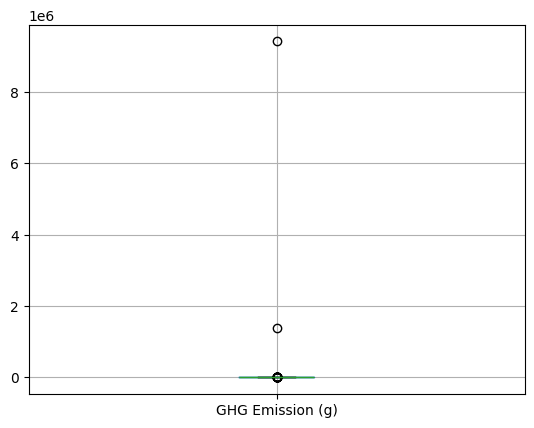

In [71]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [72]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [73]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [74]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

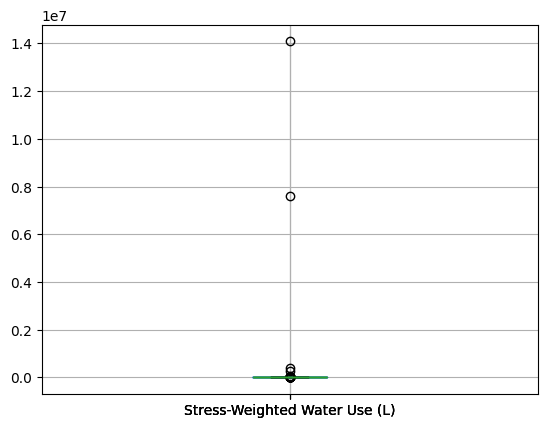

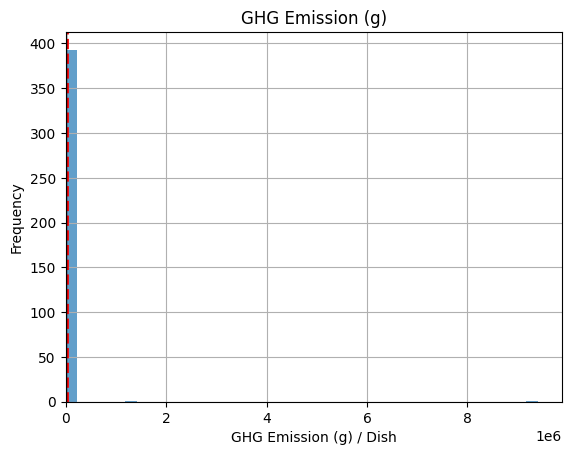

In [75]:
# These figures were not loading earlier because there were not any folders for the path required, so now that is working
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_dish.png')
plt.show()

In [76]:
# Products.hist(column=['GHG Emission (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['GHG Emission (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['GHG Emission (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('GHG Emission (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'GHGe_100g.png')
# plt.show()

# Using isna() or isnull() to find NaN values in 'GHG Emission (g) / 100g' column
rows_with_nan = Products[Products['GHG Emission (g) / 100g'].isna()]

# Display the rows containing NaN values
print(rows_with_nan)


      ProdId          Description SalesGroup  Weight (g)  GHG Emission (g)  \
394  I-71938  FRIES 3/8IN*CRINKLE    PRODUCE         0.0               0.0   

     N lost (g)  Land Use (m^2)  Freshwater Withdrawals (L)  \
394         0.0             0.0                         0.0   

     Stress-Weighted Water Use (L)  GHG Emission (g) / 100g  \
394                            0.0                      NaN   

     N lost (g) / 100g  Freshwater Withdrawals (L) / 100g  \
394                NaN                                NaN   

     Stress-Weighted Water Use (L) / 100g  Land Use (m^2) / 100g  
394                                   NaN                    NaN  


In [77]:
# Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_dish.png')
# plt.show()

In [78]:
# Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_100g.png')
# plt.show()

In [79]:
# Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_dish.png')
# plt.show()

In [80]:
# Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_100g.png')
# plt.show()

In [81]:
# Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_dish.png')
# plt.show()

In [82]:
# Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_100g.png')
# plt.show()

In [83]:
# Products.hist(column=['Land Use (m^2)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2).png')
# plt.show()

In [84]:
# Products.hist(column=['Land Use (m^2) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2)_per_100g.png')
# plt.show()

In [85]:
# Products.to_csv('C:/Users/ENTER_HERE/CFFS-S23/CFFS-22-23/data/preprocessed/Products_List.csv', index = False)